<div style="border: 2px solid #4A90E2; padding: 20px; border-radius: 15px; background-color: #f0f8ff; text-align: center; font-family: 'Arial', sans-serif;">
    <h2 style="color:#1F4E79;">ECOLE NATIONALE DE LA STATISTIQUE ET DE L'ANALYSE ECONOMIQUE PIERRE NDIAYE</h2>
    <h3 style="color:#2E86C1;">COURS DE STATISTIQUES EXPLORATOIRE ET SPATIALE - ISE1_CYCLE LONG</h3>
    <h4 style="color:#4A90E2;">ENSEIGNANT: MR HEMA</h4>
    <h4 style="color:#1F4E79;">TP1 INIDIVIDUEL - PYTHON</h4>
    <p style="font-size:16px; color:#34495E;">PAYS : GHANA <br> Par LESLYE PATRICIA NKWA TSAMO</p>
</div>


In [ ]:
# Importation des librairies

In [1]:
pip install rasterio geopandas numpy matplotlib rioxarray geopandas shapely rich

  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/2a/2f/63d2cacc0e525f8e3398bcf32bd3620385f22cd1600834ec49d7f3597a7b/rioxarray-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for xarray>=2024.7.0 from https://files.pythonhosted.org/packages/86/b4/cfa7aa56807dd2d9db0576c3440b3acd51bae6207338ec5610d4878e5c9b/xarray-2025.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB ? eta -:--:--
     ------------------------------- ------ 51.2/61.0 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
  Obtaining dependency information for packaging from https://files.pythonh

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [3]:
pip install rioxarray



  Obtaining dependency information for rioxarray from https://files.pythonhosted.org/packages/2a/2f/63d2cacc0e525f8e3398bcf32bd3620385f22cd1600834ec49d7f3597a7b/rioxarray-0.19.0-py3-none-any.whl.metadata
  Using cached rioxarray-0.19.0-py3-none-any.whl.metadata (5.5 kB)
  Obtaining dependency information for xarray>=2024.7.0 from https://files.pythonhosted.org/packages/86/b4/cfa7aa56807dd2d9db0576c3440b3acd51bae6207338ec5610d4878e5c9b/xarray-2025.11.0-py3-none-any.whl.metadata
  Using cached xarray-2025.11.0-py3-none-any.whl.metadata (12 kB)
Using cached rioxarray-0.19.0-py3-none-any.whl (62 kB)
Using cached xarray-2025.11.0-py3-none-any.whl (1.4 MB)
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.6.0
    Uninstalling xarray-2023.6.0:
      Successfully uninstalled xarray-2023.6.0


In [4]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rxr


In [ ]:
# Chargement du chemin vers le raster

In [43]:
raster_path = "C:\\Users\\HP\\Desktop\\LESLYE\\ISEP3\\SES\\TP1_LESLYE_NKWA_ISE1CL\\gha_subnational_admin_2000_2020.tif"

pop = rxr.open_rasterio(raster_path).squeeze()/ 100


In [66]:
#Propriétés du raster
print("=== PROPRIÉTÉS GLOBALES DU RASTER ===")
print(f"Dimensions (lignes, colonnes) : {pop.shape}")
print(f"Résolution (m) : {pop.rio.resolution()}")
print(f"Système de coordonnées : {pop.rio.crs}")


=== PROPRIÉTÉS GLOBALES DU RASTER ===
Dimensions (lignes, colonnes) : (7721, 5337)
Résolution (m) : (0.00083333333, -0.00083333333)
Système de coordonnées : EPSG:4326


In [45]:
#Calcul de la surface

r_m = pop.rio.reproject("EPSG:3857")


# Taille d’un pixel (m)
res_x, res_y = r_m.rio.resolution()
pixel_area = abs(res_x * res_y)  # en m²

# Nombre de pixels non nuls
nb_pixels = np.count_nonzero(~np.isnan(r_m.values))

# Surface totale en km²
surface_km2 = nb_pixels * pixel_area / 1e6


In [46]:
surface_km2

358227.31499897805

In [47]:
data = r_m.values[0]

total_pop = np.nansum(data)
mean_pop = np.nanmean(data)
max_pop = np.nanmax(data)
min_pop = np.nanmin(data)


In [50]:
# Statistiques globales

print("Population totale :", total_pop)
print("Nombre de pixels :", nb_pixels)
print("Surface totale (km²) :", surface_km2)
print("Population moyenne par pixel :", mean_pop)
print("Population max d’un pixel :", max_pop)
print("Population min d’un pixel :", min_pop)


Population totale : 20643491.869999994
Nombre de pixels : 41053800
Surface totale (km²) : 358227.31499897805
Population moyenne par pixel : 3894.9984660377345
Population max d’un pixel : 2881864.29
Population min d’un pixel : 88.88


In [51]:
regions = gpd.read_file("C:\\Users\\HP\\Desktop\\LESLYE\\ISEP3\\SES\\TP1_LESLYE_NKWA_ISE1CL\\gadm41_GHA_shp")
regions = regions.to_crs(pop.rio.crs)


C:\Users\HP\anaconda3\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'gadm41_GHA_shp': 'gadm41_GHA_0' (default), 'gadm41_GHA_1', 'gadm41_GHA_2'. Specify layer parameter to avoid this warning.
  result = read_func(


In [52]:
regions

,GID_0,COUNTRY,geometry
0,GHA,Ghana,"POLYGON ((-1.77306 4.87536, -1.77318 4.8754, -..."


In [53]:
print(regions.columns)


Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')


In [ ]:
#Chargement du chemin vers le shapefile

In [54]:
adm2 = gpd.read_file("C:\\Users\\HP\\Desktop\\LESLYE\\ISEP3\\SES\\TP1_LESLYE_NKWA_ISE1CL\\gadm41_GHA_shp\\gadm41_GHA_1.shp")


In [55]:
pip install rasterstats

Note: you may need to restart the kernel to use updated packages.


In [56]:
from rasterstats import zonal_stats
import pandas as pd

In [57]:
adm2 = adm2.to_crs("EPSG:4326")   # même CRS que WorldPop
adm2.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,GHA1_2,GHA,Ghana,Ahafo,NA,NA,Region,Region,NA,NA,GH-AF,"POLYGON ((-2.41599 6.6588, -2.41612 6.65887, -..."
1,GHA2_2,GHA,Ghana,Ashanti,NA,NA,Region,Region,NA,NA,GH-AH,"POLYGON ((-0.75537 6.91273, -0.75536 6.9127, -..."
2,GHA3_2,GHA,Ghana,Bono,NA,NA,Region,Region,NA,NA,GH-BO,"POLYGON ((-2.86623 6.8524, -2.86639 6.85248, -..."
3,GHA4_2,GHA,Ghana,Bono East,NA,NA,Region,Region,NA,NA,GH-BE,"POLYGON ((-1.43358 7.57346, -1.4352 7.56992, -..."
4,GHA5_2,GHA,Ghana,Central,NA,NA,Region,Region,NA,NA,GH-CP,"POLYGON ((-0.75619 5.71017, -0.75569 5.71023, ..."


In [ ]:
# Calcul de statistques zonales

In [58]:
stats = zonal_stats(
    adm2,
    pop.values,
    affine=pop.rio.transform(),
    stats=["sum", "mean", "median", "min", "max"],
    nodata=0
)


In [59]:
adm2_stats = adm2.copy()
adm2_stats["pop_total"] = [s["sum"] for s in stats]
adm2_stats["pop_mean"] = [s["mean"] for s in stats]
adm2_stats["pop_median"] = [s["median"] for s in stats]
adm2_stats["pop_min"] = [s["min"] for s in stats]
adm2_stats["pop_max"] = [s["max"] for s in stats]


In [60]:
adm2_stats = adm2_stats.to_crs(3857)  # projeter en mètres
adm2_stats["area_km2"] = adm2_stats.area / 1e6

adm2_stats = adm2_stats.to_crs(4326)  # retour CRS initial

adm2_stats["density"] = adm2_stats["pop_total"] / adm2_stats["area_km2"]


In [61]:
adm2_stats[["NAME_1", "pop_total", "density", "area_km2"]].sort_values("pop_total", ascending=False).head()


,NAME_1,pop_total,density,area_km2
10,Savannah,1.205998e+13,3.258809e+08,37007.320429
8,Northern,8.423550e+12,3.277014e+08,25704.954820
1,Ashanti,8.258387e+12,3.318020e+08,24889.500889
3,Bono East,7.592984e+12,3.182562e+08,23858.086265
12,Upper West,6.359917e+12,3.211733e+08,19802.133486


In [67]:
# Carte choroplèthe : Population totale

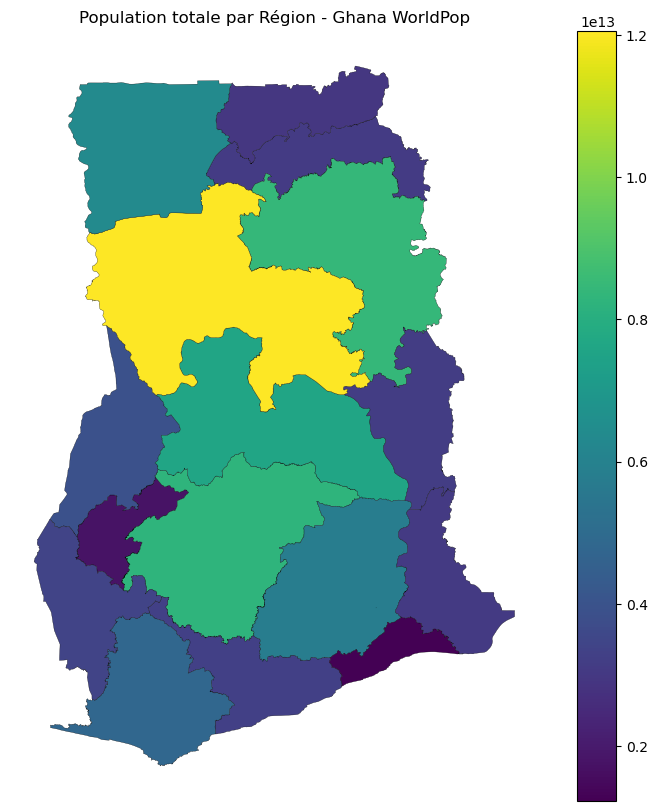

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

adm2_stats.plot(
    column="pop_total",
    cmap="viridis",
    legend=True,
    edgecolor="black",
    linewidth=0.2,
    ax=ax
)

ax.set_title("Population totale par Région - Ghana WorldPop")
ax.axis("off")
plt.show()


In [68]:
#Carte choroplèthe : Densité de population

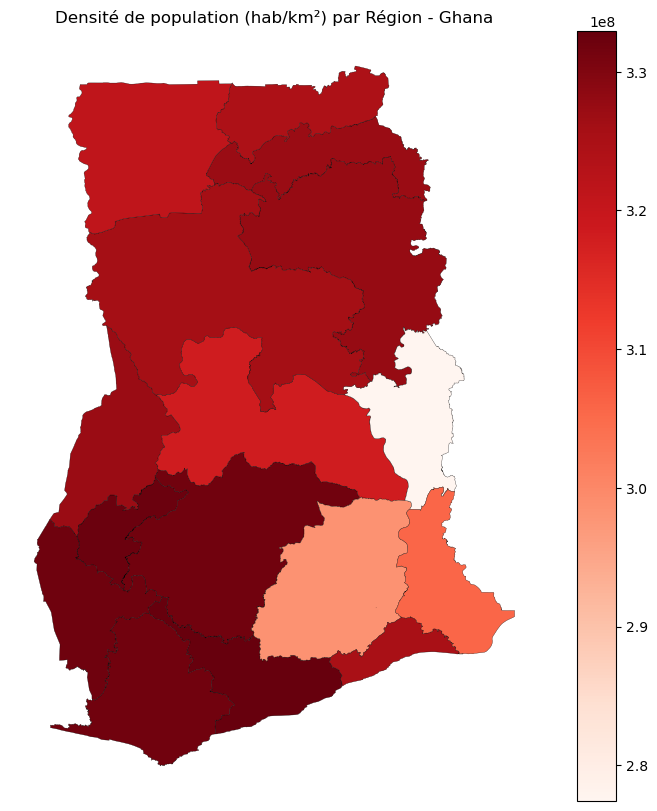

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

adm2_stats.plot(
    column="density",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.2,
    ax=ax
)

ax.set_title("Densité de population (hab/km²) par Région - Ghana")
ax.axis("off")
plt.show()


In [64]:
pop.values.min(), pop.values.max()


(0.0, 2881865.5)

In [65]:
pop.attrs


{'AREA_OR_POINT': 'Area',
 '_FillValue': 8888,
 'scale_factor': 1.0,
 'add_offset': 0.0}